## Title : Decision Tree를 활용한 마트 고객 소비지수 등급 예측

####  내용 : 마트 고객 구매 정보 (연령, 나이, 연수입에 따른 소비수준을 1-100으로 소비지수를 분류함, 높을수록 소비도가 높음
####  분류 : A,B,C,D (4분위로 나눔) 0~24, 25~49, 50~74, 75~100
####  예측 : 나이와 연수입을 넣었을때, 해당 고객의 소비수준을 예측할 수 있음
#### 데이터수집 : Kaggle Mall Customer Data 
#### 데이터가공 : Grouping 및 Type 변경
#### 데이터학습 : train and test
#### 하이퍼파라미터 조정해 적절한 모델 찾기
#### 모델평가 : 나이와 연령에 따라 예측 가능
#### test 데이터로 accuray 계산 : 정확도는.. 0.3 ㅠㅠ..

In [163]:
import numpy as np

In [164]:
import pandas as pd

In [165]:
from sklearn.svm import LinearSVC #학습방법 SVM(분류, 회귀) -> SVC는 Classfier(분류) -> 전류도 판단

#SVM은 추측, 회귀도 가능

In [166]:
from sklearn.metrics import accuracy_score # 학습한 후, 정확도를 구하기 위해

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
customer_data = pd.read_csv('Mall_Customers.csv', encoding='utf-8')

In [170]:
customer_data #마트 구매 고객정보 : 연령, 나이, 연수입(ex,k), spending socre=  구매지표

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [171]:
for_list = customer_data.loc[:,'Spending Score (1-100)'].apply(int)#결과 (정답) spending score
for_list

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [239]:
add_col = [] # list 만듦
#스펜딩 스코어 수치에 따라 0~25 = D, 25~49 = C, 50~74 = B, 75 이상은 A로 분류
#소비수치에 따라 등급을 분류함 -> 범주화 용도
for x in for_list:
    if x <= 25 :
        add_col.append('D')
    elif x < 50:
        add_col.append('C')
    elif x < 75:
        add_col.append('B')
    else :
        add_col.append('A')

customer_data['spending_score_grade']= add_col
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),spending_score_grade
0,1,Male,19,15,39,C
1,2,Male,21,15,81,A
2,3,Female,20,16,6,D
3,4,Female,23,16,77,A
4,5,Female,31,17,40,C
...,...,...,...,...,...,...
195,196,Female,35,120,79,A
196,197,Female,45,126,28,C
197,198,Male,32,126,74,B
198,199,Male,32,137,18,D


In [408]:
#1 학습데이터 
# 주요항목 : -> 2차원 배열
learn_data = customer_data.loc[:,["Age", "Annual Income (k$)"]] #학습 : 나이와 연수입에 따라 학습을 시킴

#2. 항목을 가지고 판단하는 결과 -> 1차원 배열
learn_label = customer_data.loc[:, 'spending_score_grade'] #정답 : 소비 등급을 맞추어보자

In [409]:
x_train, x_test, y_train, y_test = train_test_split(learn_data, learn_label, test_size=0.2, train_size=0.8, shuffle=True) #8대2로 섞음

## 머신러닝 학습데이터 / 검증데이터 분류

In [410]:
x_train #학습데이터 = 문제데이터

,Age,Annual Income (k$)
24,54,28
100,23,62
9,30,19
139,35,74
117,49,65
...,...,...
34,49,33
63,54,47
159,30,78
189,36,103


In [411]:
y_train #학습 정답 데이터

24     D
100    C
9      B
139    B
117    B
      ..
34     D
63     B
159    B
189    A
144    D
Name: spending_score_grade, Length: 160, dtype: object

In [313]:
x_test #검증 데이터(내 검증 데이터)

,Age,Annual Income (k$)
146,48,77
160,56,79
130,47,71
13,24,20
154,47,78
109,66,63
61,19,46
57,69,44
62,67,47
197,32,126


In [314]:
y_test #내 검증 정답 데이터

146    C
160    C
130    D
13     A
154    D
109    C
61     B
57     C
62     B
197    B
65     B
51     B
79     C
75     B
196    C
18     C
87     B
116    C
86     B
145    A
182    D
135    A
133    B
70     B
192    D
19     A
163    A
162    D
11     A
168    C
114    C
67     C
139    B
9      B
15     A
68     B
166    D
161    A
4      C
85     C
Name: spending_score_grade, dtype: object

In [315]:
#학습 시킬 방법(학습기, estimator,해당하는 객체 생성 
clf = LinearSVC() #객체생성 -> 선을 그릴 수 있는 (X,Y 파라미터 담을)

## Linear 선으로 정확도 체크

In [414]:
clf.fit(x_train, y_train) 
#LINEAR 선에서 가장 가까운 값을 찾아서, 이걸 학습시킨 후 -> 이 결과로 내 데이터를 넣어서 정확도를 측정한다.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [415]:
test_data = x_test #내가 검증할 데이터 -> 
test_label = clf.predict(test_data) #검증데이터(결과) = 답안지

In [416]:
test_label #내가 검증할 데이터를 머신러닝으로 돌린 것

array(['C', 'A', 'A', 'C', 'A', 'C', 'C', 'C', 'C', 'A', 'C', 'A', 'A',
       'C', 'C', 'D', 'C', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'C', 'C',
       'A', 'A', 'C', 'D', 'C', 'C', 'A', 'A', 'C', 'A', 'C', 'C', 'D',
       'A'], dtype=object)

In [417]:
#확인 결과 정확도 살펴봄 :
accuracy_score(y_test, test_label)

0.2

## **상관관계분석**

In [418]:
import seaborn as sns #상관도 그래프 분석

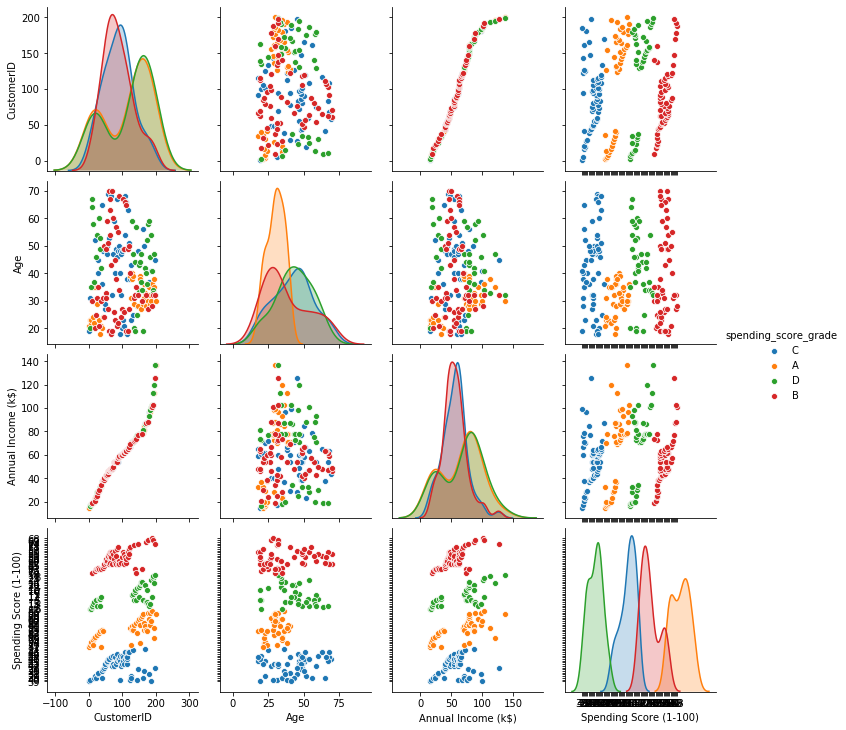

In [419]:
sns.pairplot(customer_data, hue='spending_score_grade')#상관도 그래프 그리기 

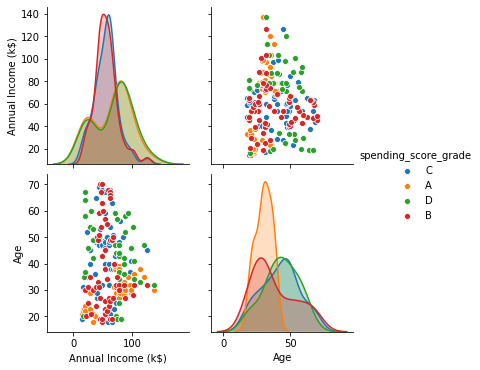

In [420]:
sns.pairplot(customer_data, hue='spending_score_grade', vars=['Annual Income (k$)', 'Age'])
#소비수준과 나이에 따른 상관관계 분석
#분류하기 어려워 보임... ㅠㅠ

# 성별로 분류

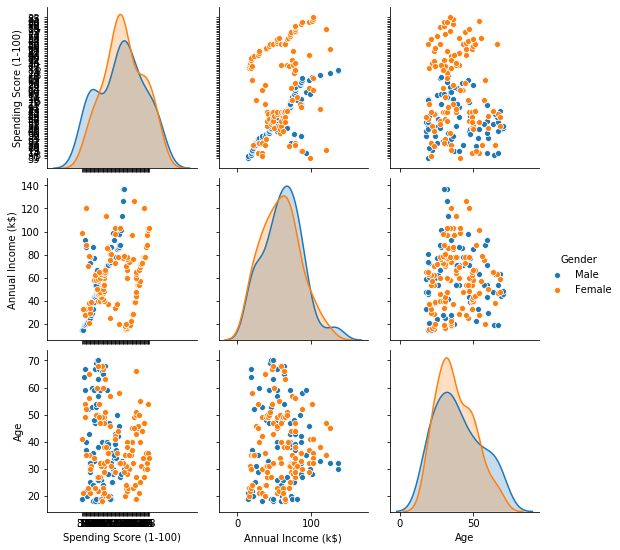

In [421]:
sns.pairplot(customer_data, hue='Gender', vars=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'])#상관도 그래프 그리기 
#hue로 그룹화
#성별로 나눈 그래프 또한, 

## 성별로 hue(group) 화를 시켰을때는, 특별한 구별점이 보이지 않음

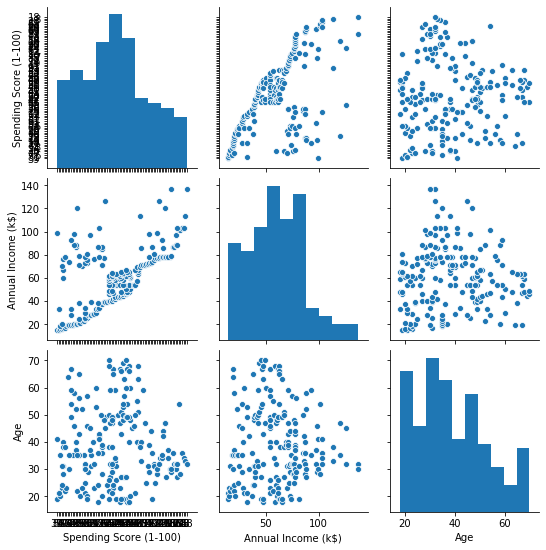

In [422]:
sns.pairplot(customer_data, vars=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'])#상관도 그래프 그리기 
#hue로 그룹화

In [423]:
customer_data['Spending Score (1-100)'] = customer_data['Spending Score (1-100)'].apply(str)

In [424]:
data = customer_data.loc[:,['Annual Income (k$)', 'Age']]

In [425]:
data #연수입과 나이 -> test data 추출

,Annual Income (k$),Age
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31
...,...,...
195,120,35
196,126,45
197,126,32
198,137,32


In [426]:
correct = customer_data.loc[:,'spending_score_grade']#결과 (정답) spending score

In [427]:
correct.apply(str) #spending score -> 오브젝트로 변환

0      C
1      A
2      D
3      A
4      C
      ..
195    A
196    C
197    B
198    D
199    A
Name: spending_score_grade, Length: 200, dtype: object

In [428]:
from sklearn.tree import DecisionTreeClassifier # 분류 라이브러리

In [429]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=13) #Class 사용 -> tree_clf 로 객체 만들어놓음
#max_depth - 하이퍼 파라미터

In [430]:
tree_clf.fit(data, correct) #fit 공부 -> data는 학습데이터, correct는 정답

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

## graphviz를 이용한 dot 노드 문서 작성
## 연수입, 나이에 따른 Spending Grade(A,B,C,D) 학습용도

In [431]:
export_graphviz(
    tree_clf, #의사결정 객체
    out_file = 'customer_tree.dot', #파일저장 경로
    feature_names=['Annual Income (k$)', 'Age'], #피처 = 속성값을 두개로 넣는듯
    class_names = customer_data['spending_score_grade'],
    rounded = True,
    filled = True
)
#class_name 을 스트링으로 바꿔줘야하는듯

In [432]:
import graphviz

In [433]:
with open('customer_tree.dot') as f:
    dot_graph = f.read()

In [434]:
dot = graphviz.Source(dot_graph)

In [435]:
dot.format = 'png'

In [436]:
dot.render(filename = 'customer_spending_score_tree', directory='image/Spending_tree', cleanup = True)

'image/Spending_tree\\customer_spending_score_tree.png'

In [437]:
tree_clf.predict_proba([[120, 35]]) #:  x는 연수입, y는 나이

array([[0.55555556, 0.        , 0.22222222, 0.22222222]])

## 영앤리치, 마트 플렉스 구매 등급 머신러닝 테스트

In [438]:
## 머신러닝 테스트 
tree_clf.predict_proba([[170, 21]]) #:  x는 연수입, y는 나이

array([[0., 0., 0., 1.]])

### A 등급  : 소비수치가 75 이상으로 정의됨. 
### 소득이 많고, 연령이 적을수록 소비등급 및 수치가 높음( 소비수치 1등급)

## ** 올드앤리치 마트 구매 등급 머신러닝 테스트

In [439]:
## 머신러닝 테스트 
tree_clf.predict_proba([[170, 75]]) #:  x는 연수입, y는 나이

array([[0., 0., 1., 0.]])

### B 등급 : 소비수치 50~75 사이
### 소득이 170k, 나이가 75 인 사람은 소비수치가 50~75로 B등급임( 소비수치 2등급)

In [440]:
tree_clf.predict_proba([[20, 16]])

array([[0., 1., 0., 0.]])

### C등급 : 소비수치 25~49 사이
### 소득이 20k, 나이 16인 사람은 소비수치가 25~49로 C등급임( 소비수치 3등급)